In [144]:
import pandas as pd

df = pd.read_csv('meritocracy_detailed3.csv')
df = df[df['time_step'] > 39]
df = df.dropna(axis='columns')
df

,time_step,trainee_id,performance,personality,personality_effect,entry_time,group_id,group_score,group_share_normal,group_share_overachiever,...,3-1-1_filter,3-2-0_filter,4-0-1_filter,4-1-0_filter,5-0-0_filter,group_internal_performance_residiual_from_mean,group_internal_performance_std,new_guy_filter,last_promoted,newest_group_member
40000,40,2800,0.4956,charismatic_idiot,0.7627,37,0,13.7202,0.8,0.0,...,False,False,True,False,False,-2.2484,1.6779,True,charismatic_idiot,charismatic_idiot
40001,40,2250,3.5477,normal,0.0000,26,0,13.7202,0.8,0.0,...,False,False,True,False,False,0.8037,1.6779,False,charismatic_idiot,charismatic_idiot
40002,40,2600,2.4431,normal,0.0000,33,0,13.7202,0.8,0.0,...,False,False,True,False,False,-0.3009,1.6779,False,charismatic_idiot,charismatic_idiot
40003,40,2000,5.4556,normal,0.0000,21,0,13.7202,0.8,0.0,...,False,False,True,False,False,2.7116,1.6779,False,charismatic_idiot,charismatic_idiot
40004,40,2650,1.7782,normal,0.0000,34,0,13.7202,0.8,0.0,...,False,False,True,False,False,-0.9658,1.6779,False,charismatic_idiot,charismatic_idiot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99,5949,1.1659,normal,0.0000,99,199,9.8206,0.8,0.2,...,False,False,False,True,False,-0.7982,1.3218,True,normal,normal
99996,99,5449,0.6194,normal,0.0000,89,199,9.8206,0.8,0.2,...,False,False,False,True,False,-1.3447,1.3218,False,normal,normal
99997,99,4849,3.5710,normal,0.0000,77,199,9.8206,0.8,0.2,...,False,False,False,True,False,1.6069,1.3218,False,normal,normal
99998,99,5649,3.5673,overachiever,-0.8383,93,199,9.8206,0.8,0.2,...,False,False,False,True,False,1.6032,1.3218,False,normal,normal


In [145]:

df.sort_values(['trainee_id','time_step'], inplace=True)

# Function to compute slope and residuals per trainee
def compute_slope_residuals(group):
    x = group['time_step'].values
    y = group['performance'].values
    if len(x) < 2:
        slope = np.nan
        intercept = np.nan
        predicted = np.full_like(y, np.nan, dtype=float)
    else:
        slope, intercept = np.polyfit(x, y, 1)
        predicted = intercept + slope * x
    group['perf_slope'] = slope
    group['perf_residual'] = y - predicted
    return group

# Apply per trainee
result_df = df.groupby('trainee_id', group_keys=False).apply(compute_slope_residuals)

# Residual change per trainee
result_df['perf_residual_change'] = result_df.groupby('trainee_id')['perf_residual'].diff()

# Keep relevant columns
slopes_cols = result_df[['trainee_id','time_step','perf_slope','perf_residual','perf_residual_change']]

# Merge back into original df
df = df.merge(slopes_cols, on=['trainee_id','time_step'], how='left')

df

,time_step,trainee_id,performance,personality,personality_effect,entry_time,group_id,group_score,group_share_normal,group_share_overachiever,...,4-1-0_filter,5-0-0_filter,group_internal_performance_residiual_from_mean,group_internal_performance_std,new_guy_filter,last_promoted,newest_group_member,perf_slope,perf_residual,perf_residual_change
0,40,90,3.0251,normal,0.0000,0,18,15.2874,0.6,0.2,...,False,False,-0.0324,2.3764,False,overachiever,normal,0.41785,-0.04475,NaN
1,41,90,3.5533,normal,0.0000,0,18,10.5396,0.6,0.0,...,False,False,1.4454,0.9656,False,overachiever,charismatic_idiot,0.41785,0.06560,0.11035
2,42,90,3.9086,normal,0.0000,0,18,11.5935,0.6,0.0,...,False,False,1.5899,1.0622,False,overachiever,charismatic_idiot,0.41785,0.00305,-0.06255
3,43,90,4.2995,normal,0.0000,0,18,12.7529,0.6,0.0,...,False,False,1.7489,1.1684,False,overachiever,charismatic_idiot,0.41785,-0.02390,-0.02695
4,40,306,4.2234,normal,0.0000,0,61,12.9171,0.6,0.2,...,False,False,1.6400,1.5211,False,normal,charismatic_idiot,0.30709,-0.07978,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,99,5945,1.7162,normal,0.0000,99,174,9.5973,0.6,0.0,...,False,False,-0.2033,0.8214,True,normal,normal,NaN,NaN,NaN
59996,99,5946,0.6001,charismatic_idiot,1.1536,99,175,9.9988,0.8,0.0,...,False,False,-1.3997,1.4160,True,normal,charismatic_idiot,NaN,NaN,NaN
59997,99,5947,0.9835,normal,0.0000,99,180,12.6004,0.8,0.0,...,False,False,-1.5366,1.4242,True,charismatic_idiot,normal,NaN,NaN,NaN
59998,99,5948,1.0441,normal,0.0000,99,185,9.4067,0.8,0.0,...,False,False,-0.8372,1.1624,True,normal,normal,NaN,NaN,NaN


In [146]:
metric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
metric_vars = [col for col in metric_vars if col not in ['trainee_id', 'time_step']]

# Compute descriptive statistics
table = df[metric_vars].describe().T

# Add skewness and kurtosis
table['skew'] = df[metric_vars].skew()
table['kurtosis'] = df[metric_vars].kurtosis()

# Add range
table['range'] = table['max'] - table['min']

# Rename columns and reorder
column_mapping = {'count': 'n', 'std': 'sd', '50%': 'median'}
table = table.rename(columns=column_mapping)

ordered_cols = ['n', 'mean', 'sd', 'median', 'min', 'max', 'range', 'skew', 'kurtosis']
table = table[ordered_cols]

# Round to three decimals
table = table.round(3)

# Display the table
print(table.head())


                          n    mean      sd  median    min      max    range  \
performance         60000.0   2.460   1.387   2.233  0.000   10.517   10.517   
personality_effect  60000.0   0.120   0.678   0.000 -1.895    1.768    3.663   
entry_time          60000.0  58.904  18.904  59.000  0.000   99.000   99.000   
group_id            60000.0  99.500  57.735  99.500  0.000  199.000  199.000   
group_score         60000.0  12.300   1.847  12.254  6.039   18.438   12.399   

                     skew  kurtosis  
performance         0.708     0.231  
personality_effect -0.076    -0.236  
entry_time         -0.049    -0.827  
group_id            0.000    -1.200  
group_score         0.043    -0.317  


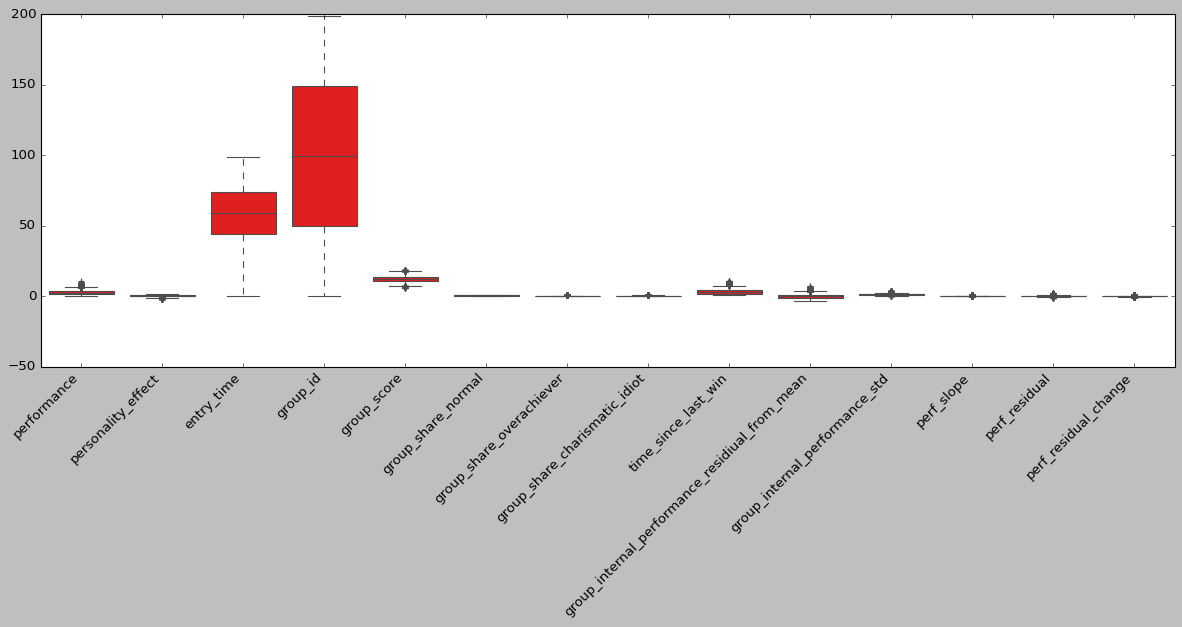

In [147]:
melted_data = pd.melt(df, value_vars=metric_vars, var_name='variable', value_name='value')

# Plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=melted_data, x='variable', y='value', color='red')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('')
plt.style.use('classic')
plt.tight_layout()
plt.show()


                                                mean_before  std_before  \
performance                                           2.460       1.387   
personality_effect                                    0.120       0.678   
entry_time                                           58.904      18.904   
group_score                                          12.300       1.847   
group_share_normal                                    0.551       0.228   
group_share_overachiever                              0.166       0.167   
group_share_charismatic_idiot                         0.283       0.199   
time_since_last_win                                   2.791       1.559   
group_internal_performance_residiual_from_mean       -0.000       1.337   
group_internal_performance_std                        1.264       0.436   
perf_slope                                            0.176       0.078   
perf_residual                                        -0.000       0.279   
perf_residual_change     

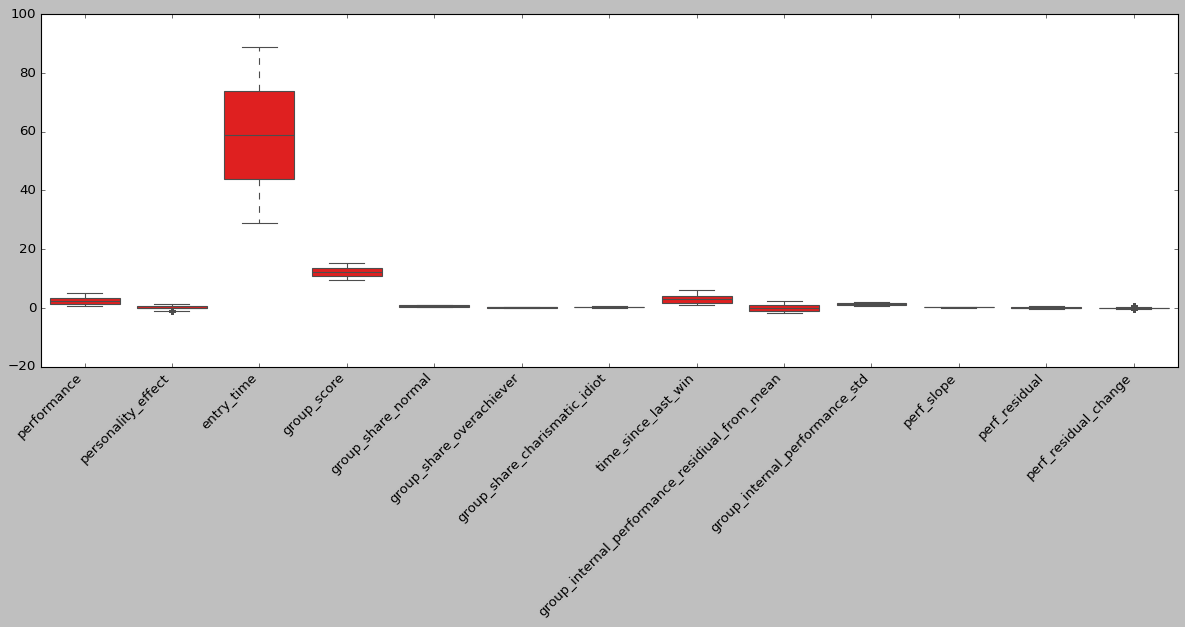

In [148]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

metric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
metric_vars = [col for col in metric_vars if col not in ['trainee_id', 'time_step', 'group_id']]


wins_df = df.copy()
for col in metric_vars:
    wins_df[col] = winsorize(df[col], limits=[0.05, 0.05])


before_stats = df[metric_vars].describe().T[['mean', 'std', 'min', 'max']]
after_stats = wins_df[metric_vars].describe().T[['mean', 'std', 'min', 'max']]
comparison = before_stats.join(after_stats, lsuffix='_before', rsuffix='_after').round(3)

print(comparison)

# Melt winsorized data for plot
melted_wins = pd.melt(wins_df, value_vars=metric_vars, var_name='variable', value_name='value')

plt.figure(figsize=(15, 8))
sns.boxplot(data=melted_wins, x='variable', y='value', color='red')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('')
plt.style.use('classic')
plt.tight_layout()
plt.show()


In [149]:
metric_cols = df.select_dtypes(include=['number']).columns.tolist()
metric_cols = [c for c in metric_cols if c not in ['trainee_id', 'time_step', 'group_id']]

# Winsorize each metric column (5% each tail)
for col in metric_cols:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])



In [150]:

%pip install --only-binary=:all: semopy==2.3.11 -q

In [151]:
import importlib, sys, subprocess, json, textwrap, math, os, types

import pandas as pd
from semopy import Model, calc_stats


person_df = (df
             .groupby('trainee_id')
             .agg({'perf_slope':'first',
                   'personality_effect':'mean',
                   'entry_time':'first',
                   'group_score':'mean',
                   'entry_time':'mean',
                   'group_share_normal':'mean',
                   'group_share_overachiever':'mean'})
             .dropna())


desc = """
perf_slope ~ personality_effect + entry_time + group_score
perf_slope ~ group_share_normal + group_share_overachiever + group_share_overachiever
"""
from semopy import Model, calc_stats

model = Model(desc)
model.fit(person_df)


coef_tab = model.inspect()
print(coef_tab)
coef_tab = model.inspect()
print(coef_tab)


fit_tab  = calc_stats(model)
print(fit_tab[['CFI','TLI','RMSEA','AIC','BIC']])


         lval  op                      rval  Estimate  Std. Err    z-value  \
0  perf_slope   ~        personality_effect -0.083420  0.001411 -59.104512   
1  perf_slope   ~                entry_time -0.001352  0.000043 -31.270845   
2  perf_slope   ~               group_score  0.011360  0.001174   9.673709   
3  perf_slope   ~        group_share_normal -0.081108  0.005192 -15.621382   
4  perf_slope   ~  group_share_overachiever -0.161895  0.008880 -18.231780   
5  perf_slope  ~~                perf_slope  0.002562  0.000058  44.440971   

   p-value  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
5      0.0  
         lval  op                      rval  Estimate  Std. Err    z-value  \
0  perf_slope   ~        personality_effect -0.083420  0.001411 -59.104512   
1  perf_slope   ~                entry_time -0.001352  0.000043 -31.270845   
2  perf_slope   ~               group_score  0.011360  0.001174   9.673709   
3  perf_slope   ~        group_share_normal -0.081